Modelo de Predador-Presa de Lotka-Volterra


C:\Users\valen\AppData\Local\Temp\ipykernel_12368\1864882120.py:25: RuntimeWarning: invalid value encountered in divide
  dN_normalized = dN / magnitude
C:\Users\valen\AppData\Local\Temp\ipykernel_12368\1864882120.py:26: RuntimeWarning: invalid value encountered in divide
  dP_normalized = dP / magnitude


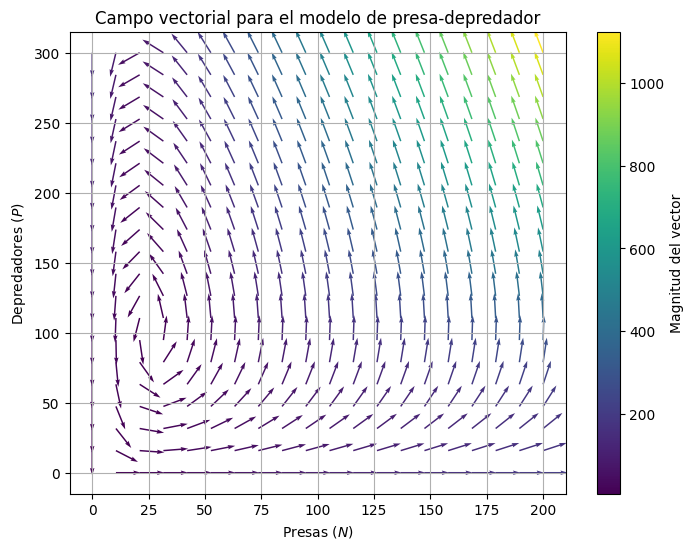

In [23]:
import numpy as np
import matplotlib.pyplot as plt


r = 1.0  
alpha = 0.01  
beta = 0.02 
q = 0.5  

# Function to compute derivatives
def model(t, Y):
    N, P = Y
    dNdt = r * N - alpha * N * P
    dPdt = beta * N * P - q * P
    return np.array([dNdt, dPdt])

# Create a grid
N_range = np.linspace(0, 200, 20)
P_range = np.linspace(0, 300, 20)
N, P = np.meshgrid(N_range, P_range)

# Compute the vector field
dN, dP = model(None, [N, P])
magnitude = np.sqrt(dN**2 + dP**2)
dN_normalized = dN / magnitude
dP_normalized = dP / magnitude

# Create the plot
plt.figure(figsize=(8, 6))
plt.quiver(N, P, dN_normalized, dP_normalized, magnitude, scale=20, cmap='viridis')
plt.xlabel('Presas ($N$)')
plt.ylabel('Depredadores ($P$)')
plt.title('Campo vectorial para el modelo de presa-depredador')
plt.colorbar(label='Magnitud del vector')
plt.grid(True)
plt.show()



C:\Users\valen\AppData\Local\Temp\ipykernel_12368\1145812763.py:25: RuntimeWarning: invalid value encountered in divide
  dN_normalized = dN / magnitude
C:\Users\valen\AppData\Local\Temp\ipykernel_12368\1145812763.py:26: RuntimeWarning: invalid value encountered in divide
  dP_normalized = dP / magnitude


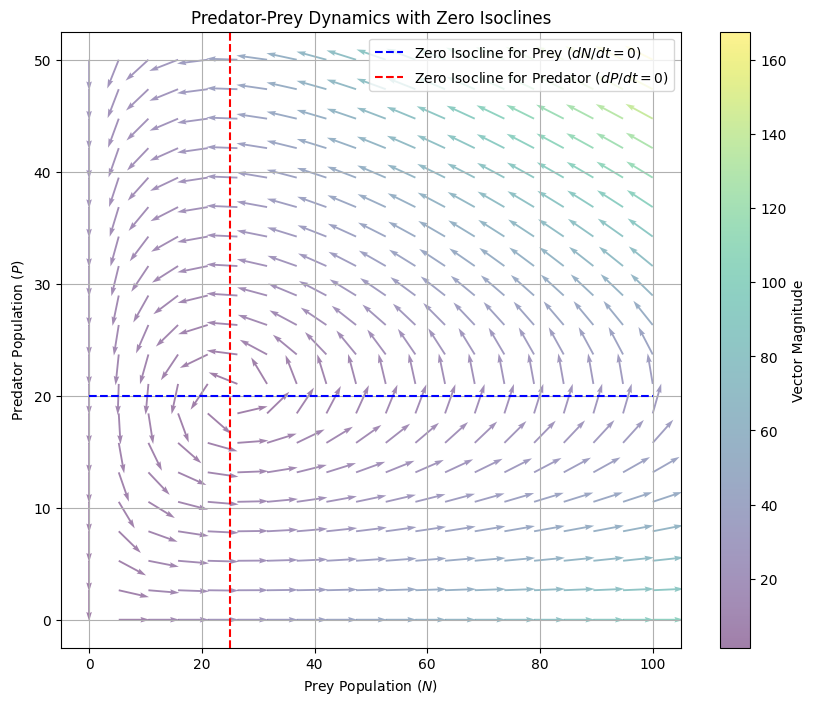

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Model parameters
r = 1.0  # Rate of increase of prey
alpha = 0.05  # Predation rate coefficient
beta = 0.02  # Conversion rate of prey into predator offspring
q = 0.5  # Natural death rate of predators

# Function to compute derivatives
def model(t, Y):
    N, P = Y
    dNdt = r * N - alpha * N * P
    dPdt = beta * N * P - q * P
    return np.array([dNdt, dPdt])

# Create a grid
N_range = np.linspace(0, 100, 20)
P_range = np.linspace(0, 50, 20)
N, P = np.meshgrid(N_range, P_range)

# Compute the vector field
dN, dP = model(None, [N, P])
magnitude = np.sqrt(dN**2 + dP**2)
dN_normalized = dN / magnitude
dP_normalized = dP / magnitude

# Zero isoclines
P_isocline_N = np.full_like(N_range, r / alpha)
N_isocline_P = np.full_like(P_range, q / beta)

# Create the plot
plt.figure(figsize=(10, 8))
plt.quiver(N, P, dN_normalized, dP_normalized, magnitude, scale=20, cmap='viridis', alpha=0.5)
plt.plot(N_range, P_isocline_N, 'b--', label='Zero Isocline for Prey ($dN/dt = 0$)')
plt.axvline(x=q / beta, color='r', linestyle='--', label='Zero Isocline for Predator ($dP/dt = 0$)')
plt.xlabel('Prey Population ($N$)')
plt.ylabel('Predator Population ($P$)')
plt.title('Predator-Prey Dynamics with Zero Isoclines')
plt.legend()
plt.colorbar(label='Vector Magnitude')
plt.grid(True)
plt.show()


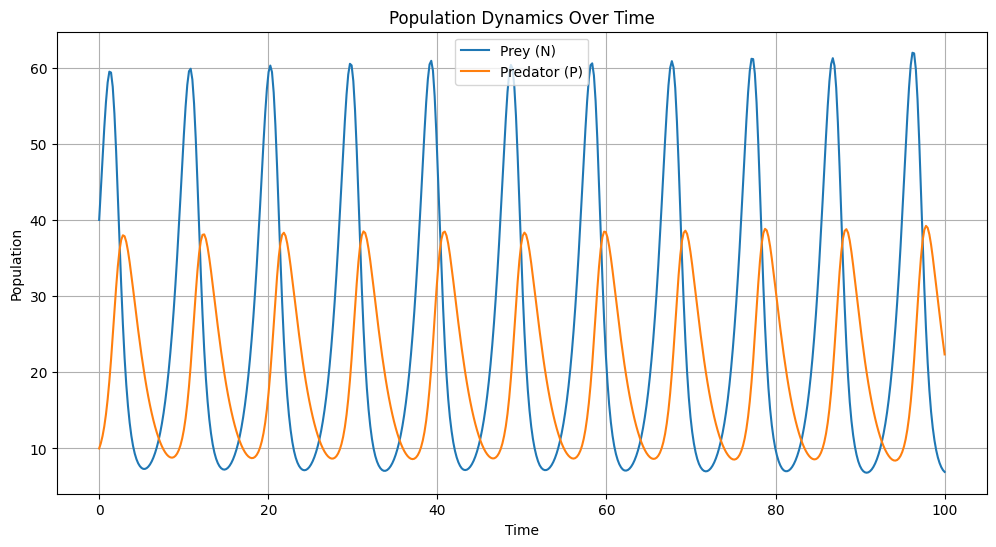

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Model parameters
r = 1.0  # Rate of increase of prey
alpha = 0.05  # Predation rate coefficient
beta = 0.02  # Conversion rate of prey into predator offspring
q = 0.5  # Natural death rate of predators

# Function to compute derivatives for the Lotka-Volterra equations
def lotka_volterra(t, Y):
    N, P = Y
    dNdt = r * N - alpha * N * P
    dPdt = beta * N * P - q * P
    return [dNdt, dPdt]

# Initial conditions
N0 = 40  # Initial prey population
P0 = 10  # Initial predator population
initial_conditions = [N0, P0]

# Time vector
t = np.linspace(0, 100, 500)  # Time from 0 to 100 in 500 steps

# Solve the differential equations using Runge-Kutta method (RK45)
solution = solve_ivp(lotka_volterra, [t.min(), t.max()], initial_conditions, t_eval=t, method='RK45')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(solution.t, solution.y[0], label='Prey (N)')
plt.plot(solution.t, solution.y[1], label='Predator (P)')
plt.title('Population Dynamics Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()
